In [1]:
import pandas as pd

df = pd.read_csv('dm2_dataset_2425_imdb/preprocessed_full.csv')
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,regions_SA,regions_UNK,countryOfOrigin_freq_enc,countryOfOrigin_NA,countryOfOrigin_AF,countryOfOrigin_AS,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK
0,Carmencita,"(5, 6]",1894.0,1894.0,1.0,0.0,2089.0,1.0,10.0,2.0,...,0,0,0.399732,1,0,0,0,0,0,0
1,Un bon bock,"(5, 6]",1892.0,1892.0,12.0,0.0,183.0,1.0,10.0,2.0,...,0,0,0.046115,0,0,0,1,0,0,0
2,Chinese Opium Den,"(4, 5]",1894.0,1894.0,1.0,0.0,195.0,1.0,10.0,1.0,...,0,0,0.399732,1,0,0,0,0,0,0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894.0,1894.0,1.0,1.0,2237.0,1.0,10.0,3.0,...,0,0,0.399732,1,0,0,0,0,0,0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896.0,1896.0,1.0,0.0,13115.0,1.0,10.0,12.0,...,1,2,0.046115,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37377,Cream of Comedy,"(6, 7]",1997.0,1997.0,60.0,0.0,102.0,1.0,10.0,0.0,...,0,0,0.034893,1,0,0,0,0,0,0
37378,Dead Meat,"(7, 8]",1993.0,1993.0,107.0,0.0,29.0,1.0,10.0,2.0,...,0,0,0.399732,1,0,0,0,0,0,0
37379,Dealer,"(6, 7]",2004.0,2004.0,130.0,10.0,1082.0,1.0,10.0,3.0,...,1,0,0.005353,0,0,0,1,0,0,0
37380,Hum Hain Khalnayak,"(5, 6]",1996.0,1996.0,NaN,0.0,15.0,1.0,10.0,2.0,...,0,0,0.034551,0,0,1,0,0,0,0


In [2]:
df = df.iloc[:len(df) // 2]
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,regions_SA,regions_UNK,countryOfOrigin_freq_enc,countryOfOrigin_NA,countryOfOrigin_AF,countryOfOrigin_AS,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK
0,Carmencita,"(5, 6]",1894.0,1894.0,1.0,0.0,2089.0,1.0,10.0,2.0,...,0,0,0.399732,1,0,0,0,0,0,0
1,Un bon bock,"(5, 6]",1892.0,1892.0,12.0,0.0,183.0,1.0,10.0,2.0,...,0,0,0.046115,0,0,0,1,0,0,0
2,Chinese Opium Den,"(4, 5]",1894.0,1894.0,1.0,0.0,195.0,1.0,10.0,1.0,...,0,0,0.399732,1,0,0,0,0,0,0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894.0,1894.0,1.0,1.0,2237.0,1.0,10.0,3.0,...,0,0,0.399732,1,0,0,0,0,0,0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896.0,1896.0,1.0,0.0,13115.0,1.0,10.0,12.0,...,1,2,0.046115,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18686,Memory & Desire,"(6, 7]",1998.0,1998.0,89.0,4.0,184.0,1.0,10.0,1.0,...,0,0,0.002310,0,0,0,0,1,0,0
18687,Memória,"(6, 7]",1990.0,1990.0,14.0,2.0,18.0,1.0,10.0,1.0,...,1,0,0.009480,0,0,0,0,0,1,0
18688,O Mentiroso,"(5, 6]",1988.0,1988.0,95.0,3.0,29.0,1.0,10.0,1.0,...,1,0,0.009480,0,0,0,0,0,1,0
18689,Mitäs me taiteilijat,"(4, 5]",1952.0,1952.0,95.0,0.0,37.0,1.0,10.0,1.0,...,0,0,0.006728,0,0,0,1,0,0,0


In [3]:
df.to_csv('dm2_dataset_2425_imdb/preprocessed_full.csv', index=False)

In [4]:
import pandas as pd
import support.df_init as df_init


df = df_init.init()
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,regions_SA,regions_UNK,countryOfOrigin_freq_enc,countryOfOrigin_NA,countryOfOrigin_AF,countryOfOrigin_AS,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK
0,Carmencita,"(5, 6]",1894.0,1894.0,1.0,0.0,2089.0,1.0,10.0,2.0,...,0,0,0.399732,1,0,0,0,0,0,0
1,Un bon bock,"(5, 6]",1892.0,1892.0,12.0,0.0,183.0,1.0,10.0,2.0,...,0,0,0.046115,0,0,0,1,0,0,0
2,Chinese Opium Den,"(4, 5]",1894.0,1894.0,1.0,0.0,195.0,1.0,10.0,1.0,...,0,0,0.399732,1,0,0,0,0,0,0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894.0,1894.0,1.0,1.0,2237.0,1.0,10.0,3.0,...,0,0,0.399732,1,0,0,0,0,0,0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896.0,1896.0,1.0,0.0,13115.0,1.0,10.0,12.0,...,1,2,0.046115,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18686,Memory & Desire,"(6, 7]",1998.0,1998.0,89.0,4.0,184.0,1.0,10.0,1.0,...,0,0,0.002310,0,0,0,0,1,0,0
18687,Memória,"(6, 7]",1990.0,1990.0,14.0,2.0,18.0,1.0,10.0,1.0,...,1,0,0.009480,0,0,0,0,0,1,0
18688,O Mentiroso,"(5, 6]",1988.0,1988.0,95.0,3.0,29.0,1.0,10.0,1.0,...,1,0,0.009480,0,0,0,0,0,1,0
18689,Mitäs me taiteilijat,"(4, 5]",1952.0,1952.0,95.0,0.0,37.0,1.0,10.0,1.0,...,0,0,0.006728,0,0,0,1,0,0,0


In [5]:
df['totalMedia'] = df['totalVideos'] + df['totalImages'] + df['totalCredits']
df['totalMedia']

0         6.0
1         4.0
2         2.0
3         7.0
4        23.0
         ... 
18686    45.0
18687    17.0
18688    34.0
18689    43.0
18690    25.0
Name: totalMedia, Length: 18691, dtype: float64

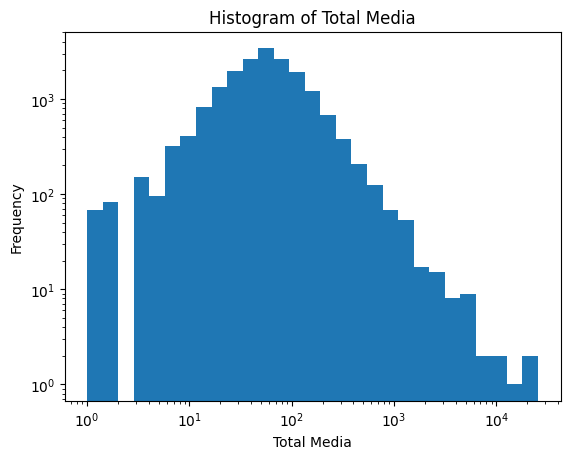

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df['totalMedia'],
         bins=np.logspace(np.log10(df['totalMedia'].min()+1),
         np.log10(df['totalMedia'].max()), 30), log=True)
plt.xscale('log')
plt.title('Histogram of Total Media')
plt.xlabel('Total Media')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.show()

In [7]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal', 'titleType',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isRatable',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres', 'castNumber', 'companiesNumber',
       'averageRating', 'regions', 'externalLinks', 'writerCredits',
       'directorsCredits', 'soundMixes', 'quotesTotal', 'totalMedia',
       'regions_freq_enc', 'regions_EU', 'regions_NA', 'regions_AS',
       'regions_AF', 'regions_OC', 'regions_SA', 'regions_UNK',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU', 'countryOfOrigin_OC',
       'countryOfOrigin_SA', 'countryOfOrigin_UNK'],
      dtype='object')

In [8]:
df['countryOfOrigin']

0          [US]
1          [FR]
2          [US]
3          [US]
4          [FR]
          ...  
18686      [NZ]
18687      [BR]
18688      [BR]
18689      [FI]
18690    [CSHH]
Name: countryOfOrigin, Length: 18691, dtype: object

In [9]:
df.to_csv('dm2_dataset_2425_imdb/preprocessed_full.csv', index=False)

In [10]:
df['regions']

0                             [DE, US, HU, GR, RU, UA, JP]
1                                 [HU, DE, FR, RO, RU, JP]
2                                     [US, DE, PT, HU, RU]
3                                 [UA, JP, HU, US, DE, RU]
4        [HU, DE, TR, FI, FR, IT, ES, SK, PL, GB, XWW, ...
                               ...                        
18686                 [NZ, JP, US, HU, ES, IT, PL, RS, DE]
18687                                                 [BR]
18688                                                 [BR]
18689                                                 [FI]
18690                                [XWG, DDDE, CSHH, CZ]
Name: regions, Length: 18691, dtype: object

In [11]:
df.loc[df.apply(lambda row: set(row['countryOfOrigin']).issubset(set(row['regions'])), axis=1)]

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,regions_SA,regions_UNK,countryOfOrigin_freq_enc,countryOfOrigin_NA,countryOfOrigin_AF,countryOfOrigin_AS,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK
0,Carmencita,"(5, 6]",1894.0,1894.0,1.0,0.0,2089.0,1.0,10.0,2.0,...,0,0,0.399732,1,0,0,0,0,0,0
1,Un bon bock,"(5, 6]",1892.0,1892.0,12.0,0.0,183.0,1.0,10.0,2.0,...,0,0,0.046115,0,0,0,1,0,0,0
2,Chinese Opium Den,"(4, 5]",1894.0,1894.0,1.0,0.0,195.0,1.0,10.0,1.0,...,0,0,0.399732,1,0,0,0,0,0,0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894.0,1894.0,1.0,1.0,2237.0,1.0,10.0,3.0,...,0,0,0.399732,1,0,0,0,0,0,0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896.0,1896.0,1.0,0.0,13115.0,1.0,10.0,12.0,...,1,2,0.046115,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18686,Memory & Desire,"(6, 7]",1998.0,1998.0,89.0,4.0,184.0,1.0,10.0,1.0,...,0,0,0.002310,0,0,0,0,1,0,0
18687,Memória,"(6, 7]",1990.0,1990.0,14.0,2.0,18.0,1.0,10.0,1.0,...,1,0,0.009480,0,0,0,0,0,1,0
18688,O Mentiroso,"(5, 6]",1988.0,1988.0,95.0,3.0,29.0,1.0,10.0,1.0,...,1,0,0.009480,0,0,0,0,0,1,0
18689,Mitäs me taiteilijat,"(4, 5]",1952.0,1952.0,95.0,0.0,37.0,1.0,10.0,1.0,...,0,0,0.006728,0,0,0,1,0,0,0


In [12]:
import support.countries_handling as ch

ch.get_encoded(df['regions'].iloc[2])

{'_NA': 1, '_EU': 4, '_AF': 0, '_AS': 0, '_OC': 0, '_SA': 0, '_UNK': 0}

In [13]:
new_columns, _ = ch.explode_continents_and_freq_enc(df)
for col in new_columns.columns:
    df[col] = new_columns[col]

In [14]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal', 'titleType',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isRatable',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres', 'castNumber', 'companiesNumber',
       'averageRating', 'regions', 'externalLinks', 'writerCredits',
       'directorsCredits', 'soundMixes', 'quotesTotal', 'totalMedia',
       'regions_freq_enc', 'regions_EU', 'regions_NA', 'regions_AS',
       'regions_AF', 'regions_OC', 'regions_SA', 'regions_UNK',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU', 'countryOfOrigin_OC',
       'countryOfOrigin_SA', 'countryOfOrigin_UNK'],
      dtype='object')

In [15]:
df.to_csv('dm2_dataset_2425_imdb/preprocessed_full.csv', index=False)

In [16]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal', 'titleType',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isRatable',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres', 'castNumber', 'companiesNumber',
       'averageRating', 'regions', 'externalLinks', 'writerCredits',
       'directorsCredits', 'soundMixes', 'quotesTotal', 'totalMedia',
       'regions_freq_enc', 'regions_EU', 'regions_NA', 'regions_AS',
       'regions_AF', 'regions_OC', 'regions_SA', 'regions_UNK',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU', 'countryOfOrigin_OC',
       'countryOfOrigin_SA', 'countryOfOrigin_UNK'],
      dtype='object')